# 1. Load and explore the dataset

In [234]:
import pandas as pd
from statistics import mean, stdev
from random import randint

import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, precision_score,confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import StratifiedKFold,GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, RandomForestRegressor
import numpy as np

In [283]:
data=pd.read_csv(r"C:\Users\brian\Pictures\audit_data\audit_risk.csv")

In [10]:
data.head(10)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
5,3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,...,0.4,0,0.2,0.0,2.0,2.156,0.4,0.5,0.4312,0
6,3.89,7,1.10,0.4,0.440,7.41,0.4,2.964,8.51,5.0,...,0.4,0,0.2,0.0,3.2,31.774,0.4,0.5,6.3548,1
7,3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,...,0.4,0,0.2,0.0,4.2,18.034,0.4,0.5,3.6068,1
8,3.89,8,8.40,0.6,5.040,11.05,0.6,6.630,19.45,5.5,...,0.4,0,0.2,0.0,4.2,17.206,0.4,0.5,3.4412,1
9,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,...,0.4,0,0.2,0.0,2.4,4.372,0.4,0.5,0.8744,0


In [11]:
#find percentage of outcomes classified as risky or represented by 1,this enable us to know if the outcome is balanced
r=round(sum(data.Risk/len(data.Risk)*100))
r

39

<AxesSubplot:xlabel='Risk', ylabel='count'>

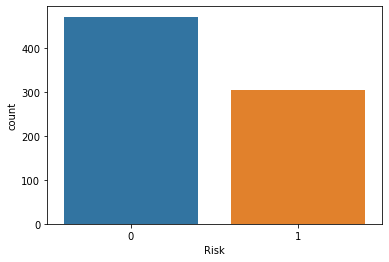

In [217]:
sns.countplot(x=data['Risk'], label = "Count") 

-Its a classification task 

-There are two classes,therefore a binary classification

-From the above cell we can see that the outcome is not balced,ration is 39/61

In [284]:
data.shape
CLS=['LOCATION_ID','TOTAL']
data.drop(CLS,axis=1, inplace=True)

# 2. Create a separate test set

In [286]:
y=data['Risk'] 
X=data.drop('Risk',axis=1) # drop the target
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)

In [278]:
X

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,6.0,0.6,3.6,...,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,0.49,0.2,0.098,0.40,0.2,0.080,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156
772,55.57,0.47,0.2,0.094,0.37,0.2,0.074,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136
773,55.57,0.24,0.2,0.048,0.04,0.2,0.008,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912
774,55.57,0.20,0.2,0.040,0.00,0.2,0.000,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880


# 3. Clean and preprocess the dataset.

In [279]:
#check for missing values
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 759 to 748
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    543 non-null    float64
 1   PARA_A          543 non-null    float64
 2   Score_A         543 non-null    float64
 3   Risk_A          543 non-null    float64
 4   PARA_B          543 non-null    float64
 5   Score_B         543 non-null    float64
 6   Risk_B          543 non-null    float64
 7   numbers         543 non-null    float64
 8   Score_B.1       543 non-null    float64
 9   Risk_C          543 non-null    float64
 10  Money_Value     542 non-null    float64
 11  Score_MV        543 non-null    float64
 12  Risk_D          543 non-null    float64
 13  District_Loss   543 non-null    int64  
 14  PROB            543 non-null    float64
 15  RiSk_E          543 non-null    float64
 16  History         543 non-null    int64  
 17  Prob            543 non-null    f

In [280]:
data.isnull().any()

Sector_score      False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value        True
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
dtype: bool

In [285]:
# fill the missing value 
data=data.fillna(method='ffill')

In [287]:
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.fit_transform(X_test)


In [288]:
X_train.shape

(543, 24)

In [289]:
#convert the target into a numpy array
m=np.array(y_train)
y_t=np.array(y_test)

In [124]:
m.shape

(543,)

 # Perform stratified cross-validation on the training and validation set

In [292]:
""" The cells stratified cross-validation using sklearn default parameters"""
regressor=RandomForestClassifier()
skf = StratifiedKFold()
list_acc=[] # empty list to store all the possible accuracies 

# the for loop iterate over all the splits and fit each one to regressor model
for train_index, test_index in skf.split(X_train_s,m):
    x_train_fold, x_test_fold =X_train_s[train_index], X_train_s[test_index]
    y_train_fold, y_test_fold = m[train_index], m[test_index]
    regressor.fit(x_train_fold, y_train_fold)    # fitting data
    list_acc.append(regressor.score(x_test_fold, y_test_fold)) # add to the list created above

In [295]:

# Print the output.

predics=rg.predict(X_test)
print('list:', list_acc)
print('\nMaximum accuracy:',
      max(list_acc)*100, '%')
print('\nMinimum Accuracy:',
      min(list_acc)*100, '%')
print('\nmean:',
      mean(list_acc)*100, '%')
print('\nStandard Deviation is:', stdev(co))
precision=precision_score(y_test,predics)
print('precison:',precision)
rec = recall_score(y_test,predics)
print('recall:',rec)

list: [1.0, 1.0, 0.9908256880733946, 1.0, 1.0]

Maximum accuracy: 100.0 %

Minimum Accuracy: 99.08256880733946 %

mean: 99.81651376146789 %

Standard Deviation is: 0.004102877022935369
precison: 0.3948497854077253
recall: 1.0


# 5. Do grid search 10-fold cross-validation to tune the hyperparameters of the random forest.

In [299]:
"""using the sklearn GridSearchCV function,we search for best hyperparameters from a given list"""

reg_model = RandomForestClassifier()
params={'random_state':[randint(1,150)],
       'n_estimators':[randint(1,8000)],
       'max_depth':[randint(1,1000)]}
rf_random = GridSearchCV(estimator = reg_model, param_grid = params,cv = 10,scoring='accuracy')
rf=rf_random.fit(X_train, y_train)
sorted(rf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'param_random_state',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [300]:
#print the best parameters
rf.best_params_

{'max_depth': 544, 'n_estimators': 5193, 'random_state': 70}

In [301]:
nr=RandomForestClassifier(max_depth=544,n_estimators= 5193,random_state= 70)
nr.fit(X_train,y_train)

RandomForestClassifier(max_depth=544, n_estimators=5193, random_state=70)

In [302]:
ip=nr.predict(X_test)
accuracy_score(y_test,ip)

1.0

In [229]:
rg = RandomForestClassifier()
list_acc1=[]
for train_index, test_index in skf.split(X_train,y_train):
    x_train_fold, x_test_fold =X_train_s[train_index], X_train_s[test_index]
    y_train_fold, y_test_fold = m[train_index], m[test_index]
    rg.fit(x_train_fold, y_train_fold)
    list_acc1.append(rg.score(x_test_fold, y_test_fold))

In [265]:
predics=rg.predict(X_test)
print('list:', list_acc1)
print('\nMaximum accuracy:',
      max(list_acc1)*100, '%')
print('\nMinimum Accuracy:',
      min(list_acc1)*100, '%')
print('\nAvarage:',
      mean(list_acc1)*100, '%')
print('\nStandard Deviation is:', stdev(list_acc1))

sd=stdev(list_acc1)
accuracy=mean(list_acc1)*100
mean_m=mean(list_acc1)
precision=precision_score(y_test,predics)
rec = recall_score(y_test,predics)
outcome = pd.DataFrame([['RandomForestClassifier',accuracy,precision,rec,mean_m,sd]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall','mean','Standard Deviation'])


list: [1.0, 1.0, 0.9908256880733946, 1.0, 1.0]

Maximum accuracy: 100.0 %

Minimum Accuracy: 99.08256880733946 %

Avarage: 99.81651376146789 %

Standard Deviation is: 0.004102877022935369


In [256]:
outcome

,Model,Accuracy,Precision,Recall,mean,Standard Deviation
0,RandomForestClassifier,99.816514,0.39485,1.0,0.998165,0.004103


# 6. Choose another 2 algorithms that are appropriate for the problem

In [191]:
scale=StandardScaler()
X_train_s=scale.fit_transform(X_train)
X_test_s=scale.fit_transform(X_test)

# 6(a) LogisticRegression model 

In [189]:
#baseline model
lg=LogisticRegression()
lg.fit(X_train_s,y_train)

LogisticRegression()

In [190]:
pre=lg.predict(X_test)
accuracy_score(y_test,pre)

0.648068669527897

In [193]:
"""performing grid search fro logistic regression"""

lg=LogisticRegression()
params={'solver':['newton-cg','liblinear','lbfgs'],
       'C':[0.01,0.5,1,0.02,0.7],
       'max_iter':[randint(500,3000)],
       'random_state':[randint(50,300)]}
lg_random = GridSearchCV(estimator =lg, param_grid = params,cv = 10,scoring='accuracy')
lg_m=lg_random.fit(X_train_s, y_train)

In [194]:
#get the best hyperparamter values
lg_m.best_params_

{'C': 1, 'max_iter': 2486, 'random_state': 164, 'solver': 'liblinear'}

In [196]:
lg_m.score(X_test,y_test)

0.6523605150214592

In [258]:

linear=LogisticRegression(C=1, max_iter= 2486, random_state= 164, solver='liblinear')
list_acc2=[]
for train_index, test_index in skf.split(X_train_s,y_train):
    x_train_fold, x_test_fold =X_train_s[train_index], X_train_s[test_index]
    y_train_fold, y_test_fold = m[train_index], m[test_index]
    linear.fit(x_train_fold, y_train_fold)
    list_acc2.append(linear.score(x_test_fold, y_test_fold))

In [266]:
predics=linear.predict(X_test_s)

print('list:', list_acc2)
print('\nMaximum accuracy:',
      max(list_acc2)*100, '%')
print('\nMinimum Accuracy:',
      min(list_acc2)*100, '%')
print('\nmean:',
      mean(list_acc2)*100, '%')
print('\nStandard Deviation is:', stdev(co))

sd=stdev(list_acc2)
accuracy=mean(list_acc2)*100
mean_m=mean(list_acc2)
precision=precision_score(y_test,predics)
rec = recall_score(y_test,predics)

outcome_m = pd.DataFrame([['LogisticRegression',accuracy,precision,rec,mean_m,sd]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall','mean','Standard Deviation'])
outcome =outcome.append(outcome_m, ignore_index = True)
outcome

list: [0.9724770642201835, 0.944954128440367, 0.9908256880733946, 0.9814814814814815, 0.9907407407407407]

Maximum accuracy: 99.08256880733946 %

Minimum Accuracy: 94.4954128440367 %

mean: 97.60958205912334 %

Standard Deviation is: 0.004102877022935369


,Model,Accuracy,Precision,Recall,mean,Standard Deviation
0,RandomForestClassifier,99.816514,0.394850,1.000000,0.998165,0.004103
1,LogisticRegression,97.609582,0.956989,0.967391,0.976096,0.018996


In [260]:
pre=linear.predict(X_test_s)
accuracy_score(y_test,pre)

0.9699570815450643

# 6(b) Support Vector Machine

In [218]:
Svm_model=SVC()
Svm_model.fit(X_train,y_train)

SVC()

In [207]:
pre=Svm_model.predict(X_test_s)
accuracy_score(y_test,pre)

0.6094420600858369

In [248]:
l=SVC()
params={
       'C':[0.01,0.5,1,10,10,100],
       'gamma':[1,0.1,0.01,0.001,],
       'kernel':['rbf','linear']}
svm_random = GridSearchCV(estimator =l, param_grid = params,cv = 10,scoring='accuracy')
svm_m=svm_random.fit(X_train_s, y_train)

In [249]:
svm_m.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'linear'}

In [251]:
svm_m.score(X_test_s,y_test)

0.9184549356223176

In [262]:
svm_model=SVC(C=100,gamma=1,kernel='linear')
list_acc3=[]
for train_index, test_index in skf.split(X_train_s,y_train):
    x_train_fold, x_test_fold =X_train_s[train_index], X_train_s[test_index]
    y_train_fold, y_test_fold = m[train_index], m[test_index]
    svm_model.fit(x_train_fold, y_train_fold)
    list_acc3.append(svm_model.score(x_test_fold, y_test_fold))

In [267]:
predics=svm_model.predict(X_test_s)

print('list:', list_acc3)
print('\nMaximum accuracy:',
      max(list_acc3)*100, '%')
print('\nMinimum Accuracy:',
      min(list_acc3)*100, '%')
print('\nmean:',
      mean(list_acc3)*100, '%')
print('\nStandard Deviation is:', stdev(co))

sd=stdev(list_acc3)
accuracy=mean(list_acc3)*100
mean_m=mean(list_acc3)
precision=precision_score(y_test,predics)
rec = recall_score(y_test,predics)

outcome_s = pd.DataFrame([['svm',accuracy,precision,rec,mean_m,sd]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall','mean','Standard Deviation'])
outcome =outcome.append(outcome_s, ignore_index = True)
outcome

list: [0.981651376146789, 0.981651376146789, 1.0, 1.0, 0.9907407407407407]

Maximum accuracy: 100.0 %

Minimum Accuracy: 98.1651376146789 %

mean: 99.08086986068638 %

Standard Deviation is: 0.004102877022935369


,Model,Accuracy,Precision,Recall,mean,Standard Deviation
0,RandomForestClassifier,99.816514,0.394850,1.000000,0.998165,0.004103
1,LogisticRegression,97.609582,0.956989,0.967391,0.976096,0.018996
2,svm,99.080870,0.900990,0.989130,0.990809,0.009174
